# Check out Pb fields from test runs

In [2]:
# Similar function but for BLING:
folder = '/ocean/brogalla/GEOTRACES/BLING-EMP101/ANHA4-EPM101_y2002m01d05_gridB.nc'

In [9]:
folder[53:63]

'2002m01d05'

In [1]:
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
from math import sin, cos, sqrt, atan2, radians
from mpl_toolkits.basemap import Basemap, cm
import cmocean
import pickle
import matplotlib

%matplotlib inline

#### Parameters:

In [2]:
# domain dimensions:
jmin, jmax = 159, 799
imin, imax = 1139, 2179

# Resolution of grid cells to show in figure:
grid_reso  = 10

# Rimwidths:
rimwidthN  = 10
rimwidthS  = 10
rimwidthW  = 10
rimwidthE  = 20

# Boundary coordinates: (i1,i2,j1,j2)
bdy_NCB = (1598,2177,777,797) # Northern Canada Basin
bdy_WCB = (2167,2177,390,797) # Western Canada Basin
bdy_LS  = (1140,1150,446,672) # Baffin Bay
bdy_HB  = (1190,1472,291,301) # Hudson Bay
land_color  = '#a9a7a2'

#### Load files:

In [3]:
mfile    = nc.Dataset('/ocean/brogalla/GEOTRACES/data/ANHA12/ANHA12_mask_Pb-20220317.nc')
mesh_lon = np.array(mfile.variables['nav_lon'])
mesh_lat = np.array(mfile.variables['nav_lat'])
mask     = np.array(mfile.variables['tmask'][0])
mesh_bathy   = np.array(mfile.variables['tmask'][0,:,:,:])
bathy_masked = np.ma.masked_where((mesh_bathy> 0.1), mesh_bathy)
mesh_depth   = np.array(mfile.variables['nav_lev'])

In [36]:
folder = '/data/brogalla/run_storage/Pb-new-ini2-spin1/'
# ave  = nc.Dataset(f'{folder}ANHA12_EXH006_1m_20020101_20021231_ave_200201-200201.nc')
comp = nc.Dataset(f'{folder}ANHA12_EXH006_1m_20020101_20021231_comp_200212-200212.nc')

# dpb         = np.array(ave.variables['dissolpb'])[:,:,:]
dpb_sed     = np.array(comp.variables['dpbsed'])[:,:,:]
dpb_sedice  = np.array(comp.variables['dpbsedice'])[:,:,:]
dpb_ads     = np.array(comp.variables['dpbads'])[:,:,:]
dpb_icedust = np.array(comp.variables['dpbicedust'])[:,:,:]
dpb_icebc   = np.array(comp.variables['dpbicebc'])[:,:,:]
dpb_atmdust = np.array(comp.variables['dpbatmdust'])[:,:,:]
dpb_atmbc   = np.array(comp.variables['dpbatmbc'])[:,:,:]
dpb_riv     = np.array(comp.variables['dpbriv'])[:,:,:]

print(f'Resuspension:    {np.mean(dpb_sed):.2e} ({np.amin(dpb_sed):.2e}  - {np.amax(dpb_sed):.2e})')
print(f'Sediment ice:    {np.mean(dpb_sedice):.2e} ({np.amin(dpb_sedice):.2e}  - {np.amax(dpb_sedice):.2e})')
print(f'Adsorption:      {np.mean(dpb_ads):.2e} ({np.amin(dpb_ads):.2e}  - {np.amax(dpb_ads):.2e})')
print(f'Ice flux dust:   {np.mean(dpb_icedust):.2e} ({np.amin(dpb_icedust):.2e}  - {np.amax(dpb_icedust):.2e})')
print(f'Ice flux bc:     {np.mean(dpb_icebc):.2e} ({np.amin(dpb_icebc):.2e}  - {np.amax(dpb_icebc):.2e})')
print(f'Atmosphere dust: {np.mean(dpb_atmdust):.2e} ({np.amin(dpb_atmdust):.2e}  - {np.amax(dpb_atmdust):.2e})')
print(f'Atmosphere bc:   {np.mean(dpb_atmbc):.2e} ({np.amin(dpb_atmbc):.2e}  - {np.amax(dpb_atmbc):.2e})')
print(f'River runoff:    {np.mean(dpb_riv):.2e} ({np.amin(dpb_riv):.2e}  - {np.amax(dpb_riv):.2e})')

Resuspension:    8.06e-18 (0.00e+00  - 1.05e-15)
Sediment ice:    3.72e-19 (0.00e+00  - 4.95e-16)
Adsorption:      1.04e-19 (0.00e+00  - 6.84e-17)
Ice flux dust:   6.38e-21 (0.00e+00  - 9.79e-19)
Ice flux bc:     7.17e-20 (0.00e+00  - 3.34e-18)
Atmosphere dust: 1.51e-20 (9.89e-26  - 7.90e-20)
Atmosphere bc:   1.46e-18 (9.71e-24  - 1.68e-17)
River runoff:    8.14e-20 (0.00e+00  - 8.88e-16)


In [37]:
folder = '/data/brogalla/run_storage/Pb-new-ini2-spin1/'
data   = nc.Dataset(f'{folder}ANHA12_EXH006_5d_20020101_20021231_ptrc_T_20021222-20021226.nc')
dpb    = np.ma.masked_where((mask[:,imin:imax,jmin:jmax] == 0), np.array(data.variables['dissolpb'])[0,:,:,:])

print(np.ma.min(dpb), np.ma.max(dpb))

0.0 5.641786e-10


In [38]:
folder = '/data/brogalla/run_storage/Pb-new-ini2-spin1/'
data   = nc.Dataset(f'{folder}ANHA12_EXH006_1m_20020101_20021231_comp_200209-200209.nc')
dpb    = np.ma.masked_where((mask[:,imin:imax,jmin:jmax] == 0), np.array(data.variables['dissolpb'])[0,:,:,:])

print(np.ma.min(dpb), np.ma.max(dpb))

0.0 5.984795e-10


In [5]:
folder = '/data/brogalla/run_storage/pb-scav12_2022-09-08T132218.909173-0400/'
data   = nc.Dataset(f'{folder}ANHA12_EXH006_5d_20020101_20021231_ptrc_T_20020116-20020120.nc')
dpb    = np.array(data.variables['dissolpb'])[0,:,:,:]

print(np.ma.min(dpb), np.ma.max(dpb))

-1.9257838e-13 4.676857e-10


In [41]:
a=np.argwhere(dpb < 0)
print(a)

[[ 16 269 217]
 [ 22  20 320]
 [ 22  20 321]
 [ 22  21 319]
 [ 22  21 320]
 [ 22  22 319]
 [ 22  22 320]
 [ 22  23 318]
 [ 22  23 319]
 [ 22  24 318]
 [ 22  24 319]
 [ 22 443 204]
 [ 22 443 205]
 [ 22 444 205]
 [ 22 444 206]]


In [43]:
dpb[:,20,320]

array([ 2.4438453e-12,  2.4438450e-12,  2.4438453e-12,  2.4438459e-12,
        2.4438468e-12,  2.4438485e-12,  2.4438509e-12,  2.4438544e-12,
        2.4438596e-12,  2.4438667e-12,  2.4438810e-12,  2.4439060e-12,
        2.4439587e-12,  2.4440376e-12,  2.4441673e-12,  2.4443485e-12,
        2.4446684e-12,  2.4452059e-12,  2.4462845e-12,  2.6669136e-12,
        2.6695577e-12,  2.7934445e-12, -1.2455977e-13,  2.4458617e-11,
        3.0371008e-11,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00], dtype=float32)

In [22]:
for depth in range(0,50):
    print(f'Min: {depth}, {np.ma.min(dpb[depth,:,:]):.2e}, max: {np.ma.max(dpb[depth,:,:]):.2e}')

Min: 0, 0.00e+00, max: 7.16e-11
Min: 1, 0.00e+00, max: 7.16e-11
Min: 2, 0.00e+00, max: 7.16e-11
Min: 3, 0.00e+00, max: 7.16e-11
Min: 4, 0.00e+00, max: 7.16e-11
Min: 5, 0.00e+00, max: 9.72e-11
Min: 6, 0.00e+00, max: 1.29e-10
Min: 7, 0.00e+00, max: 2.32e-10
Min: 8, 0.00e+00, max: 3.10e-10
Min: 9, 0.00e+00, max: 2.82e-10
Min: 10, -3.38e-13, max: 2.76e-10
Min: 11, 0.00e+00, max: 2.79e-10
Min: 12, 0.00e+00, max: 2.89e-10
Min: 13, 0.00e+00, max: 2.00e-10
Min: 14, 0.00e+00, max: 3.31e-10
Min: 15, 0.00e+00, max: 1.84e-10
Min: 16, 0.00e+00, max: 2.74e-10
Min: 17, 0.00e+00, max: 2.03e-10
Min: 18, 0.00e+00, max: 1.84e-10
Min: 19, 0.00e+00, max: 1.49e-10
Min: 20, 0.00e+00, max: 1.55e-10
Min: 21, 0.00e+00, max: 1.49e-10
Min: 22, 0.00e+00, max: 9.88e-11
Min: 23, 0.00e+00, max: 9.38e-11
Min: 24, 0.00e+00, max: 7.62e-11
Min: 25, 0.00e+00, max: 6.74e-11
Min: 26, 0.00e+00, max: 6.91e-11
Min: 27, 0.00e+00, max: 5.75e-11
Min: 28, 0.00e+00, max: 4.58e-11
Min: 29, 0.00e+00, max: 3.82e-11
Min: 30, 0.00e+00, 

#### Figure:

In [7]:
def plot_weird(variable, layer):
    
    fig, ax1, proj1 = pickle.load(open('/ocean/brogalla/GEOTRACES/pickles/pb-surface.pickle','rb'))

    x, y = proj1(mesh_lon[imin:imax,jmin:jmax], mesh_lat[imin:imax,jmin:jmax]) 
    variable_plot = np.ma.masked_where(variable[layer,:,:] >= 0, variable[layer,:,:])
    x_plot   = x[~variable_plot.mask]
    y_plot   = y[~variable_plot.mask]
    var_plot = variable_plot[~variable_plot.mask] 
    
    CB = proj1.scatter(x_plot, y_plot, c=var_plot*1e12, s=5)

    # Color bar: --------------------------------------------------------------------------------
    cbaxes = fig.add_axes([0.92, 0.155, 0.02, 0.38]);
    CBar   = plt.colorbar(CB, ax=ax1, cax=cbaxes); 
    CBar.set_label('Dissolved Pb [pM]', fontsize=7)
    CBar.ax.tick_params(axis='y', length=0, labelsize=7)
    
    return

In [8]:
def plot_weird_zoom(variable, layer):
    
    fig, ax1, proj1 = pickle.load(open('/ocean/brogalla/GEOTRACES/pickles/boothia.pickle','rb'))

    x, y = proj1(mesh_lon[imin:imax,jmin:jmax], mesh_lat[imin:imax,jmin:jmax]) 
    variable_plot = np.ma.masked_where(variable[layer,:,:] >= 0, variable[layer,:,:])
    x_plot   = x[~variable_plot.mask]
    y_plot   = y[~variable_plot.mask]
    var_plot = variable_plot[~variable_plot.mask] 
    
    CB = proj1.scatter(x_plot, y_plot, c=var_plot*1e12, s=2)

    # Color bar: --------------------------------------------------------------------------------
    cbaxes = fig.add_axes([0.92, 0.155, 0.02, 0.38]);
    CBar   = plt.colorbar(CB, ax=ax1, cax=cbaxes); 
    CBar.set_label('Dissolved Pb [pM]', fontsize=7)
    CBar.ax.tick_params(axis='y', length=0, labelsize=7)
    
    return

In [9]:
def plot_layer(variable, layer, vmin=0, vmax=30):
    
    fig, ax1, proj1 = pickle.load(open('/ocean/brogalla/GEOTRACES/pickles/pb-surface.pickle','rb'))

    x, y = proj1(mesh_lon[imin:imax,jmin:jmax], mesh_lat[imin:imax,jmin:jmax]) 
    CB = proj1.pcolormesh(x, y, variable[layer,:,:]*1e12, cmap=cmocean.cm.thermal, vmin=vmin, vmax=vmax) 
    
    ax1.set_title(f'Depth: {mesh_depth[layer]:.1f} m', fontsize=6)
    
    # Color bar: --------------------------------------------------------------------------------
    cbaxes = fig.add_axes([0.92, 0.155, 0.02, 0.38]);
    CBar   = plt.colorbar(CB, ax=ax1, cax=cbaxes); 
    CBar.set_label('Dissolved Pb [pM]', fontsize=7)
    CBar.ax.tick_params(axis='y', length=0, labelsize=7)
    
    return

In [10]:
def plot_bdy(bdy_cell, nCB_cell):

    fig, ax = plt.subplots(2,2, figsize=(4.5*2, 3.7*1.5), dpi=300)

    ax[0,0].set_title('Labrador Sea', fontsize=7)
    ax[0,1].set_title('Hudson Bay', fontsize=7)
    ax[1,0].set_title('Western Canada Basin', fontsize=7)
    ax[1,1].set_title('Northern Canada Basin', fontsize=7)

    ax[1,0].set_xlabel('Distance [km]', fontsize=6)
    ax[1,1].set_xlabel('Distance [km]', fontsize=6)
    ax[0,0].set_ylabel('Depth [m]', fontsize=6)
    ax[1,0].set_ylabel('Depth [m]', fontsize=6)

    for axis in ax.ravel():
        axis.invert_yaxis()
        axis.tick_params(axis='both', which='major', labelsize=6)

    ax[0,0].set_ylim(4000,-10)
    ax[0,1].set_ylim(300,-1)
    ax[1,0].set_ylim(3000,-10)
    ax[1,1].set_ylim(4000,-10)

    ax[0,1].set_xlim(0,1000)
    ax[1,0].set_xlim(200,1650)

    cmap     = cmocean.cm.thermal

    # Labrador Sea:
    xx, zz = np.meshgrid(S_distance[bdy_cell,:], mesh_depth)
    CB1 = ax[0,0].pcolormesh(xx, zz, dPb_S[:,bdy_cell,:], vmin=0, vmax=30, cmap=cmap)
    ax[0,0].pcolormesh(xx, zz, dPb_S_mdepths[:,bdy_cell,:], cmap=matplotlib.colors.ListedColormap([land_color]))

    # Hudson Bay: 
    xx, zz = np.meshgrid(W_distance[:,bdy_cell], mesh_depth)
    CB2 = ax[0,1].pcolormesh(xx, zz, dPb_W[:,:,bdy_cell], vmin=0, vmax=8, cmap=cmap)
    ax[0,1].pcolormesh(xx, zz, dPb_W_mdepths[:,:,bdy_cell], cmap=matplotlib.colors.ListedColormap([land_color]))

    # Western Canada Basin:
    xx, zz = np.meshgrid(N_distance[bdy_cell,:], mesh_depth)
    CB3 = ax[1,0].pcolormesh(xx, zz, dPb_N[:,bdy_cell,:], vmin=0, vmax=8, cmap=cmap)
    ax[1,0].pcolormesh(xx, zz, dPb_N_mdepths[:,bdy_cell,:], cmap=matplotlib.colors.ListedColormap([land_color]))

    # Northern Canada Basin:
    xx, zz = np.meshgrid(E_distance[::-1,nCB_cell], mesh_depth)
    CB4 = ax[1,1].pcolormesh(xx, zz, dPb_E[:,:,nCB_cell], vmin=0, vmax=8, cmap=cmap)
    ax[1,1].pcolormesh(xx, zz, dPb_E_mdepths[:,:,nCB_cell], cmap=matplotlib.colors.ListedColormap([land_color]))

    # add text labels:
    fig.text(0.13, 0.89, 'a)', fontsize=8, weight='bold');
    fig.text(0.55, 0.89, 'b)', fontsize=8, weight='bold');
    fig.text(0.13, 0.48, 'c)', fontsize=8, weight='bold');
    fig.text(0.55, 0.48, 'd)', fontsize=8, weight='bold');

    cbax1 = fig.add_axes([0.13 , 0.55, 0.01, 0.12]);
    cbax2 = fig.add_axes([0.555, 0.55, 0.01, 0.12]);
    cbax3 = fig.add_axes([0.13 , 0.14, 0.01, 0.12]);
    cbax4 = fig.add_axes([0.555, 0.14, 0.01, 0.12]);
    cbaxes = [cbax1, cbax2, cbax3, cbax4]

    for n,cb in enumerate([CB1, CB2, CB3, CB4]):
        if n > 0:
            CBar = plt.colorbar(cb, ax=ax, cax=cbaxes[n], ticks=[0,2,4,6,8]); 
        else:
            CBar = plt.colorbar(cb, ax=ax, cax=cbaxes[n]); 
        CBar.set_label('Dissolved Pb [pM]', fontsize=6)
        CBar.ax.tick_params(axis='y', length=0, labelsize=6)

    return

In [11]:
def plot_layer_zoom(variable, layer, vmin=0, vmax=30):
    
    fig, ax1, proj1 = pickle.load(open('/ocean/brogalla/GEOTRACES/pickles/boothia.pickle','rb'))
    x, y = proj1(mesh_lon[imin:imax,jmin:jmax], mesh_lat[imin:imax,jmin:jmax]) 
    variable_plot1 = np.ma.masked_where(variable[layer,:,:] == 0, variable[layer,:,:])
    CB = proj1.pcolormesh(x, y, variable_plot1*1e12, cmap=cmocean.cm.thermal, vmin=vmin, vmax=vmax) 
    
    variable_plot = np.ma.masked_where(variable[layer,:,:] >= 0, variable[layer,:,:])
    x_plot   = x[~variable_plot.mask]
    y_plot   = y[~variable_plot.mask]
    var_plot = variable_plot[~variable_plot.mask] 
    
    proj1.scatter(x_plot, y_plot, c='c', s=0.5)
    
    ax1.set_title(f'Depth: {mesh_depth[layer]:.1f} m', fontsize=6)
    
    # Color bar: --------------------------------------------------------------------------------
    cbaxes = fig.add_axes([0.92, 0.155, 0.02, 0.38]);
    CBar   = plt.colorbar(CB, ax=ax1, cax=cbaxes); 
    CBar.set_label('Dissolved Pb [pM]', fontsize=7)
    CBar.ax.tick_params(axis='y', length=0, labelsize=7)
    
    return

In [12]:
# Convert lat/lon to distance along transect:
def calc_distance(lats, lons):
    R = 6373.0 # approximate radius of earth in km

    lats_rad = [radians(l) for l in lats]
    lons_rad = [radians(l) for l in lons]

    dlon = [lon_step - lons_rad[0] for lon_step in lons_rad]
    dlat = [lat_step - lats_rad[0] for lat_step in lats_rad]

    distance = np.empty((len(dlon)))
    for i in range(0,len(dlon)):
        a = sin(dlat[i] / 2)**2 + cos(lats_rad[0]) * cos(lats_rad[i]) * sin(dlon[i] / 2)**2
        c = 2 * atan2(sqrt(a), sqrt(1 - a))
        distance[i] = R * c
        
    return distance

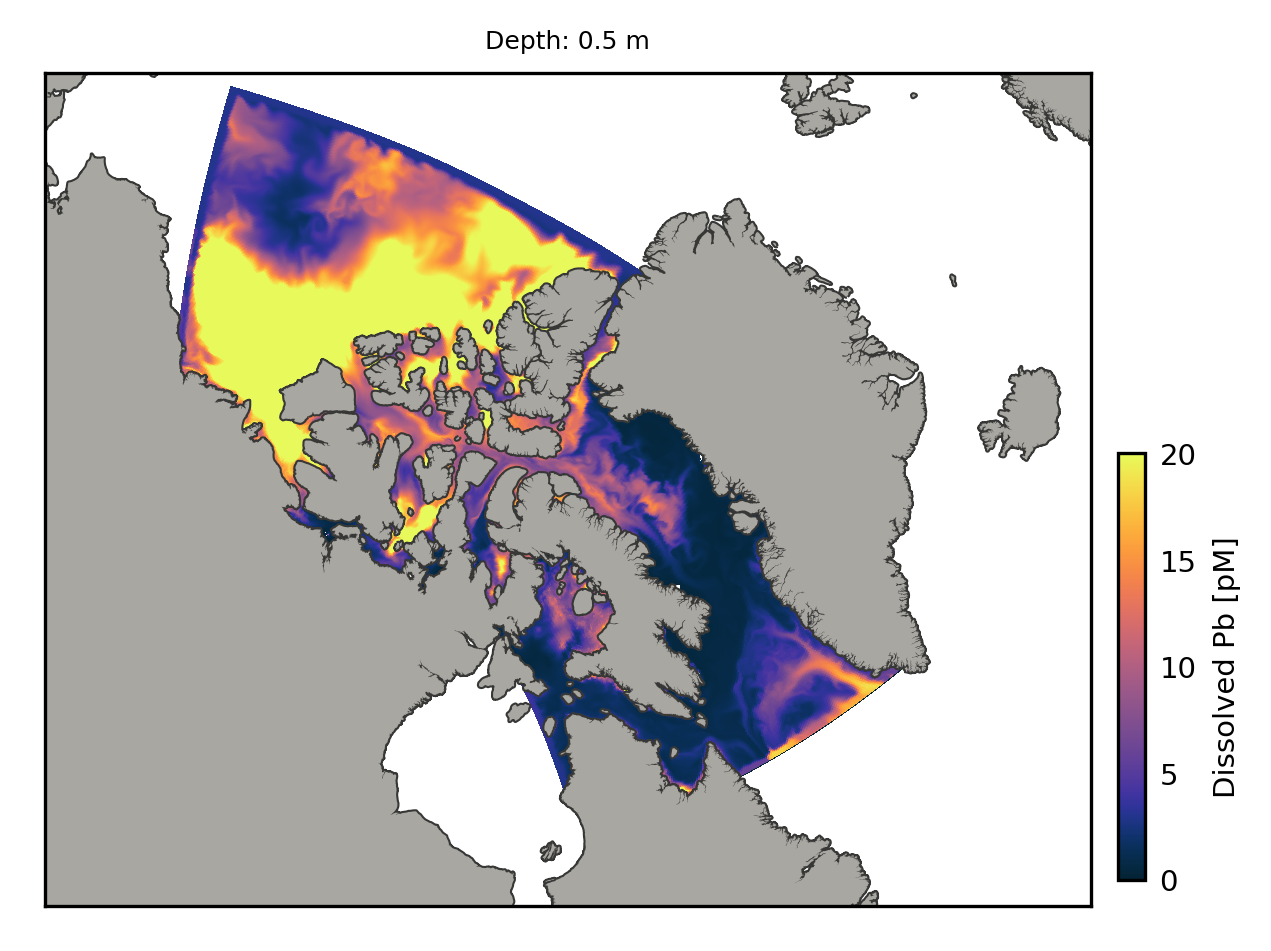

In [49]:
plot_layer(dpb, 0, vmin=0, vmax=20)

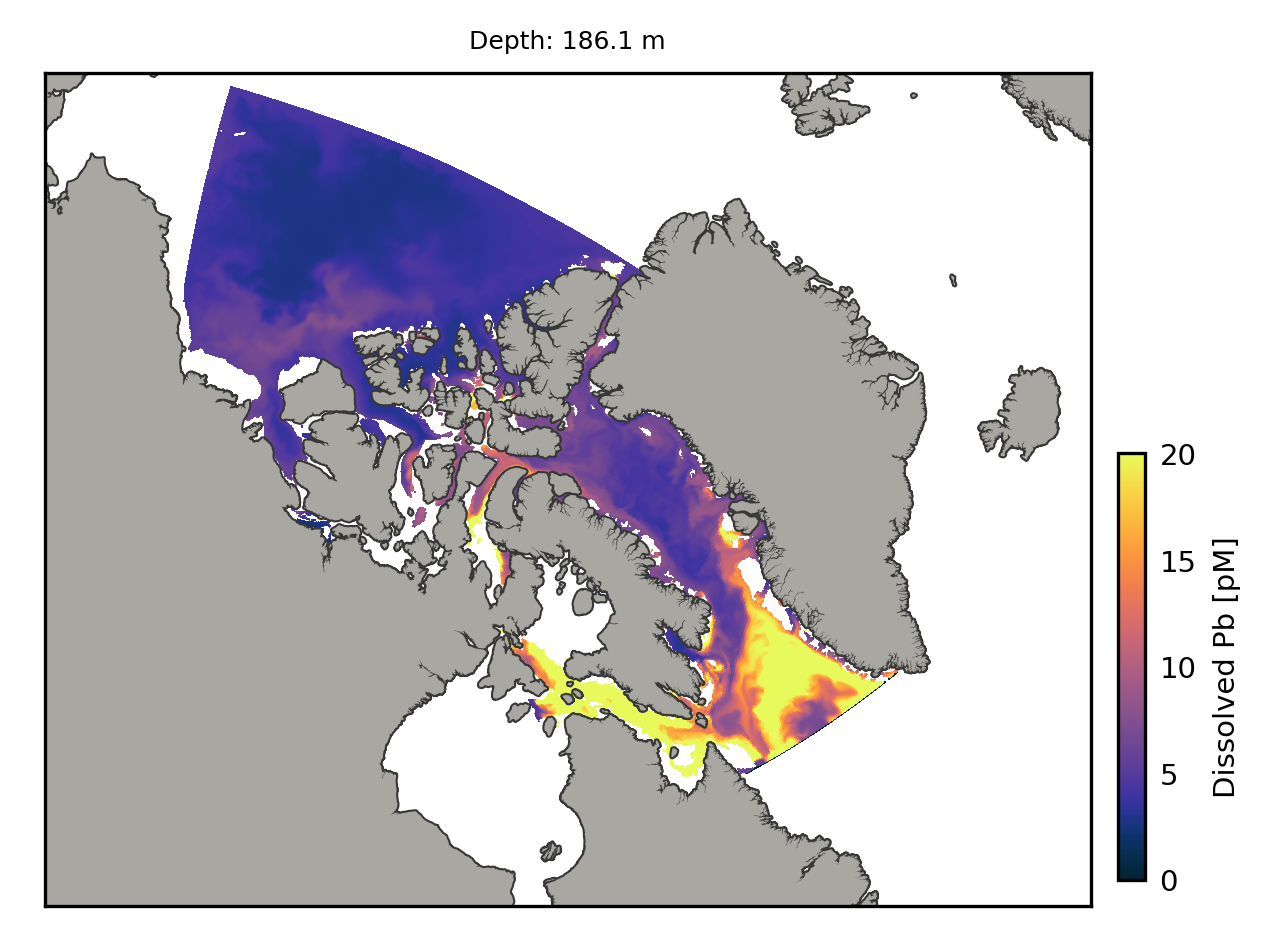

In [41]:
plot_layer(dpb, 25, vmin=0, vmax=20)

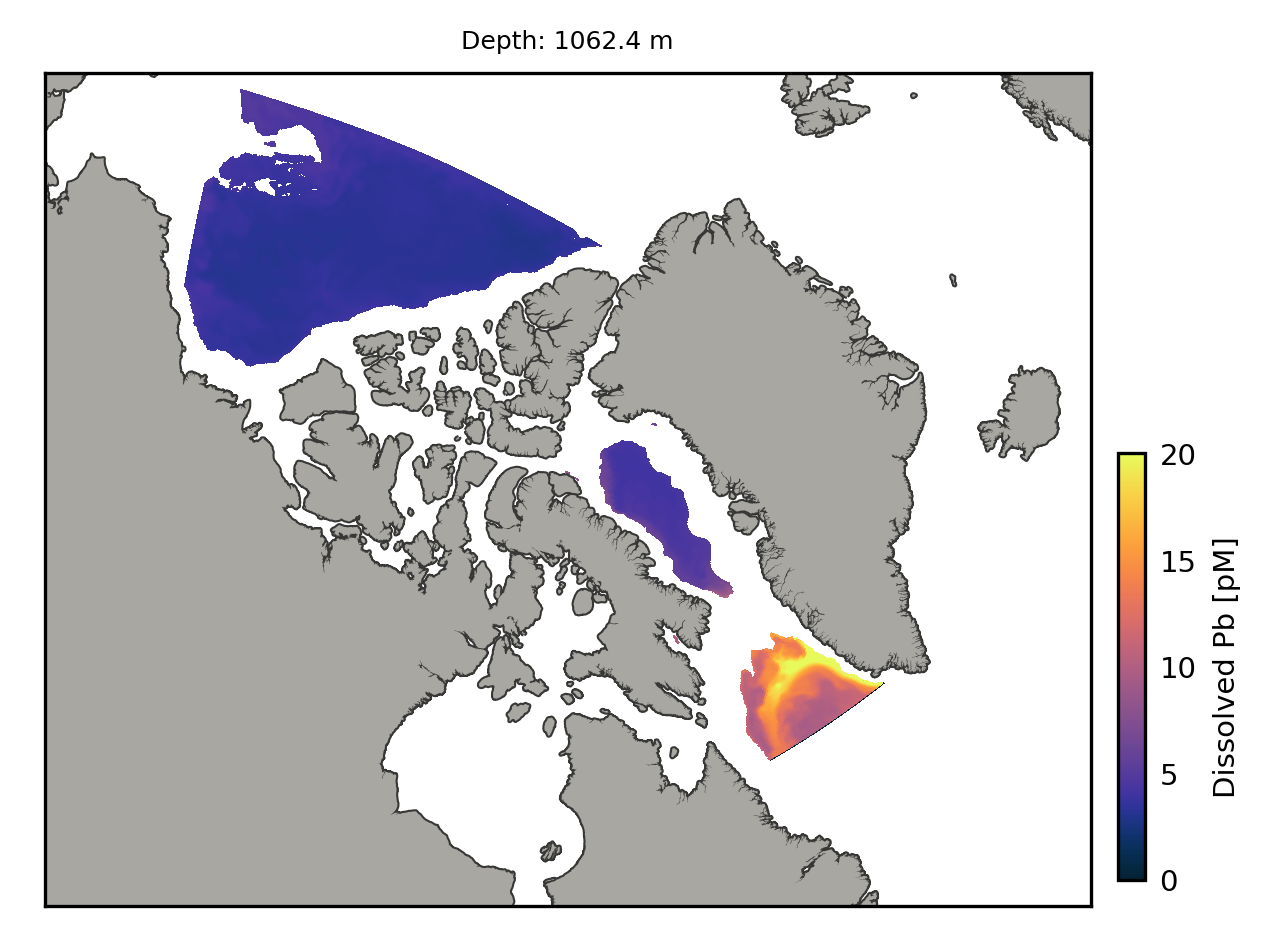

In [42]:
plot_layer(dpb, 35, vmin=0, vmax=20)

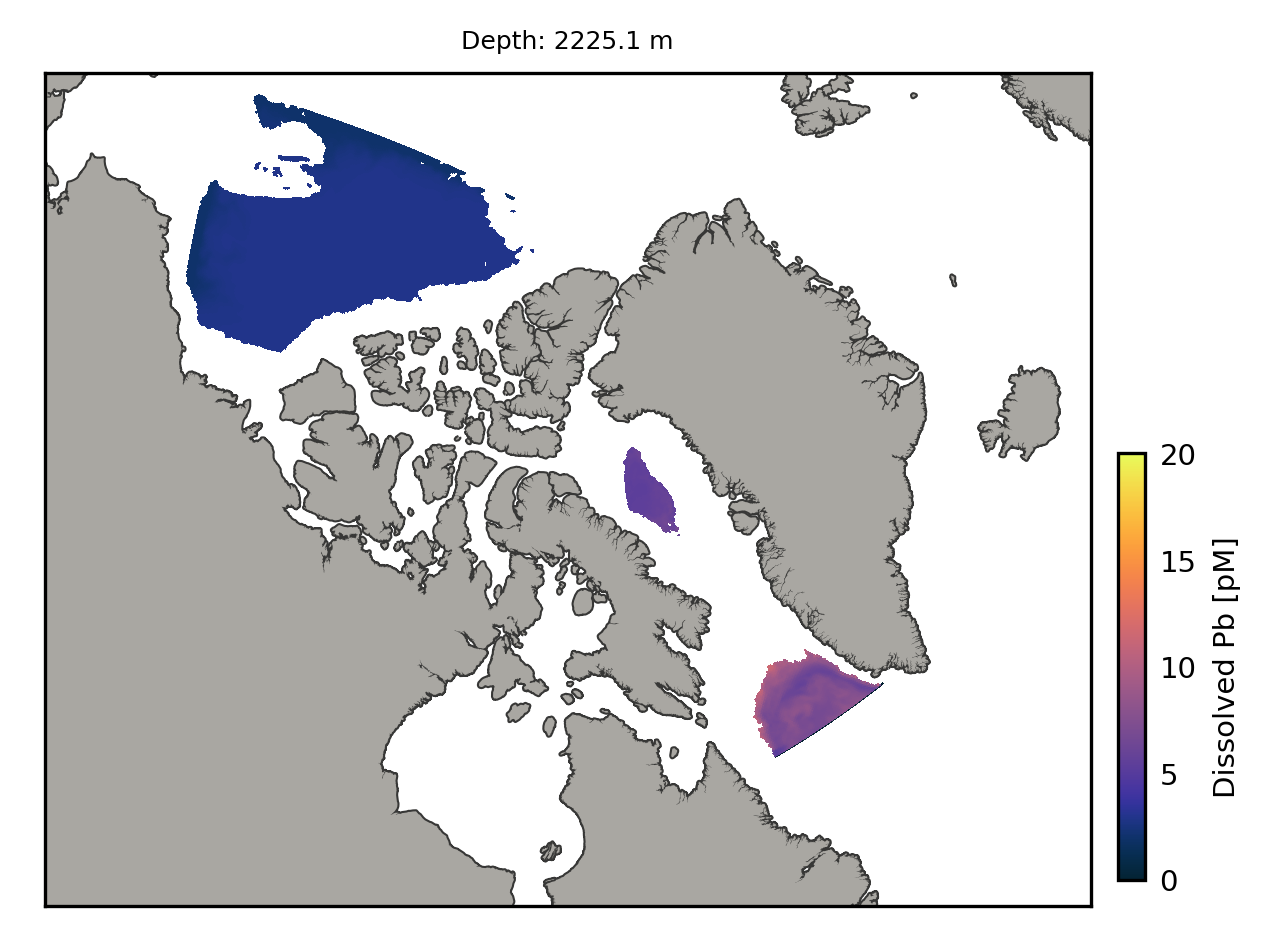

In [43]:
plot_layer(dpb, 40, vmin=0, vmax=20)

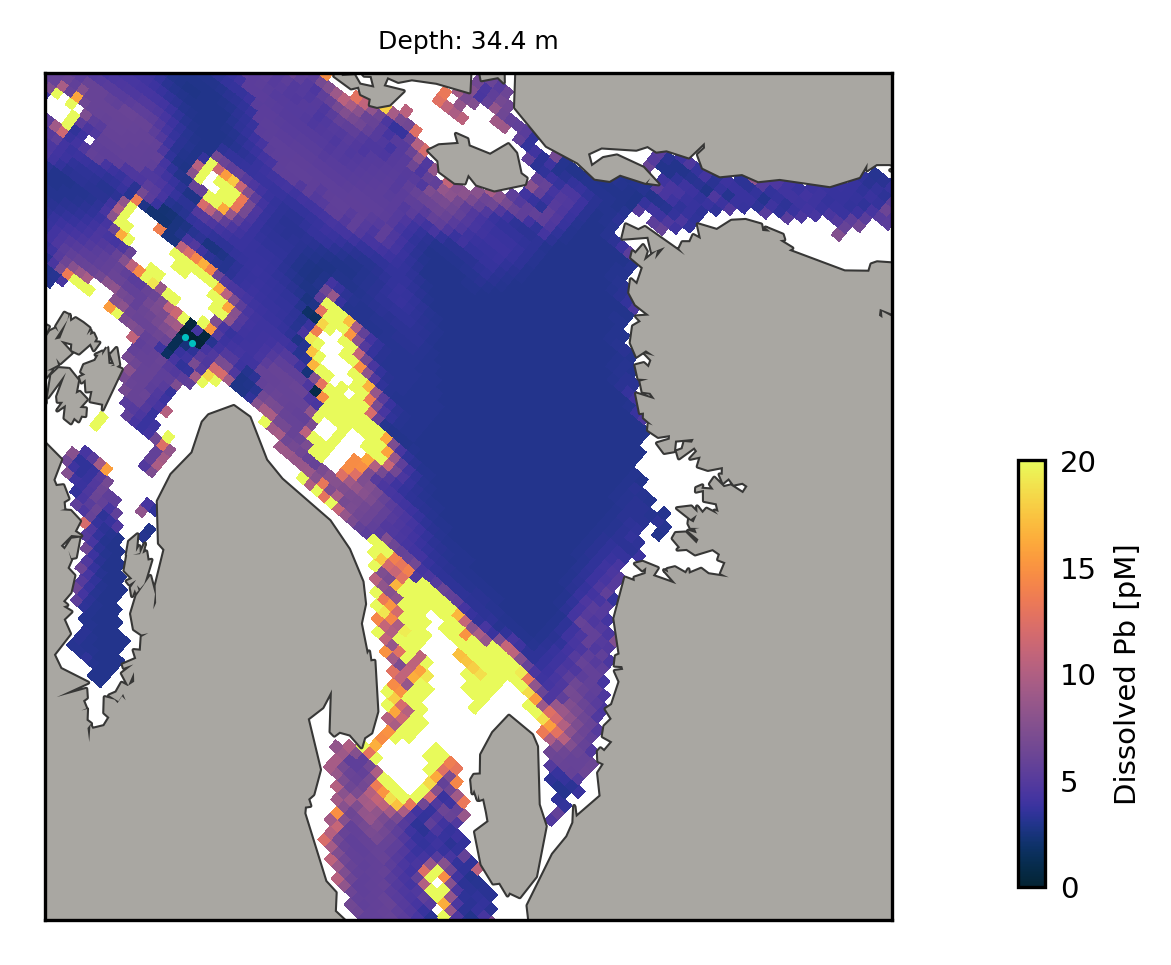

In [36]:
plot_layer_zoom(dpb, 15, vmin=0, vmax=20)

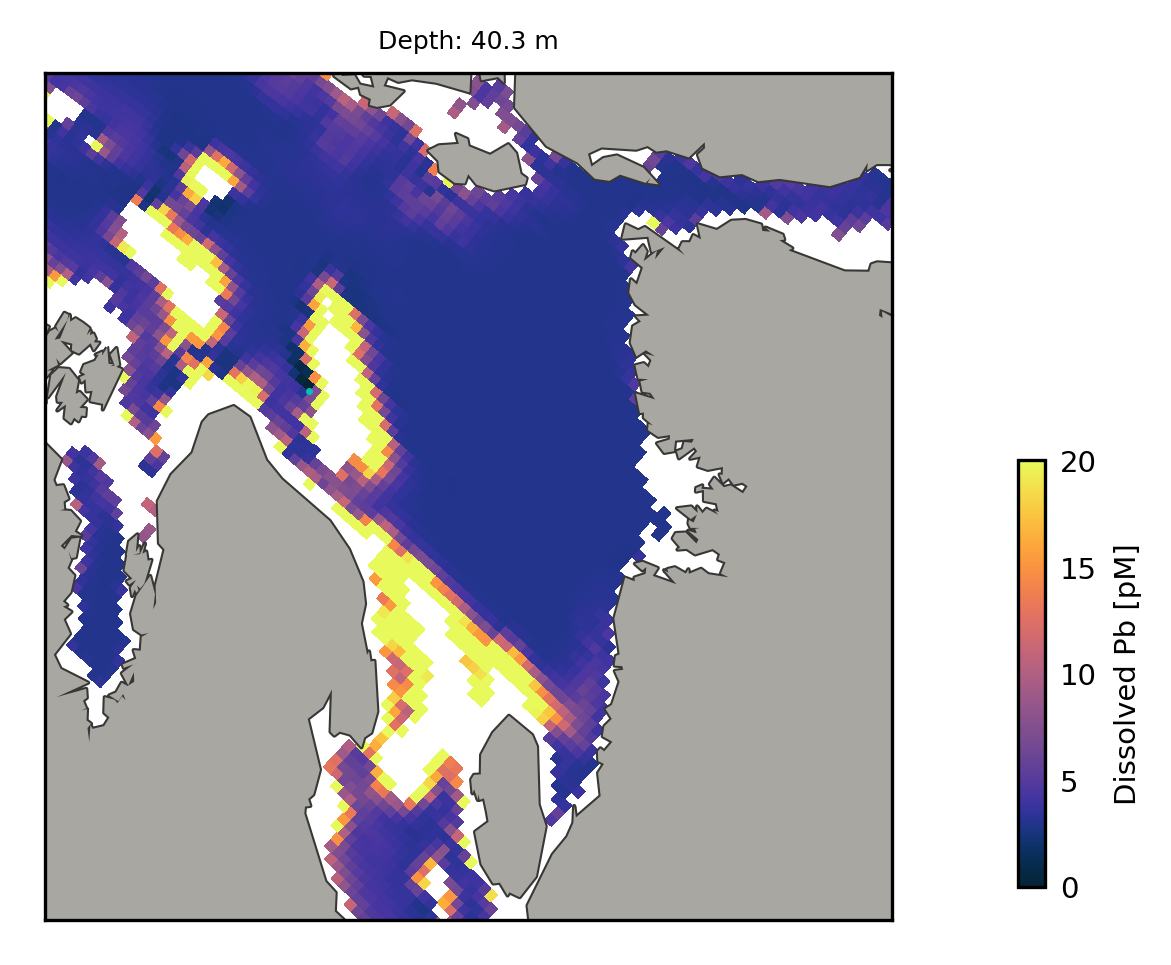

In [37]:
plot_layer_zoom(dpb, 16, vmin=0, vmax=20)

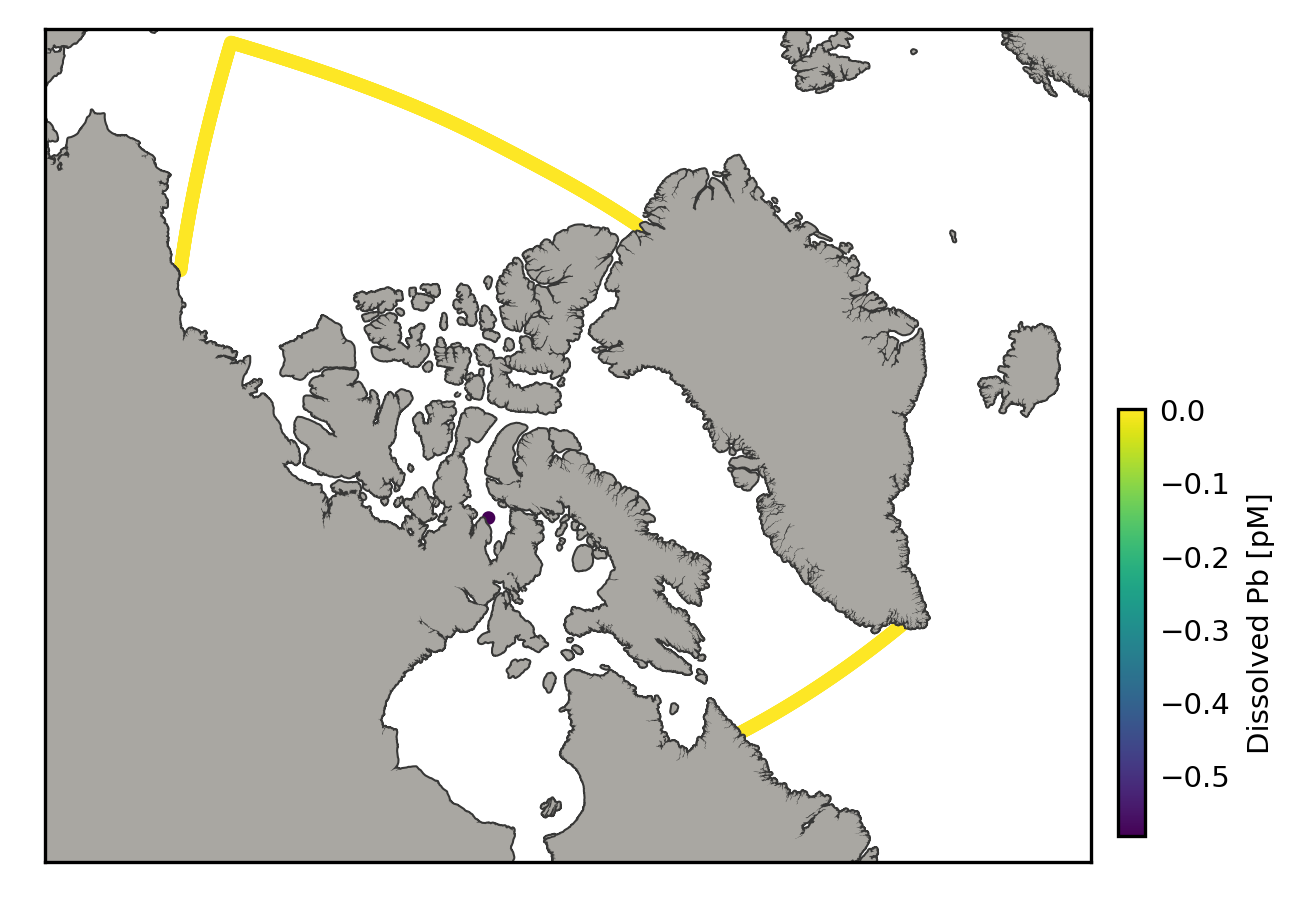

In [12]:
plot_weird(dpb, 16)

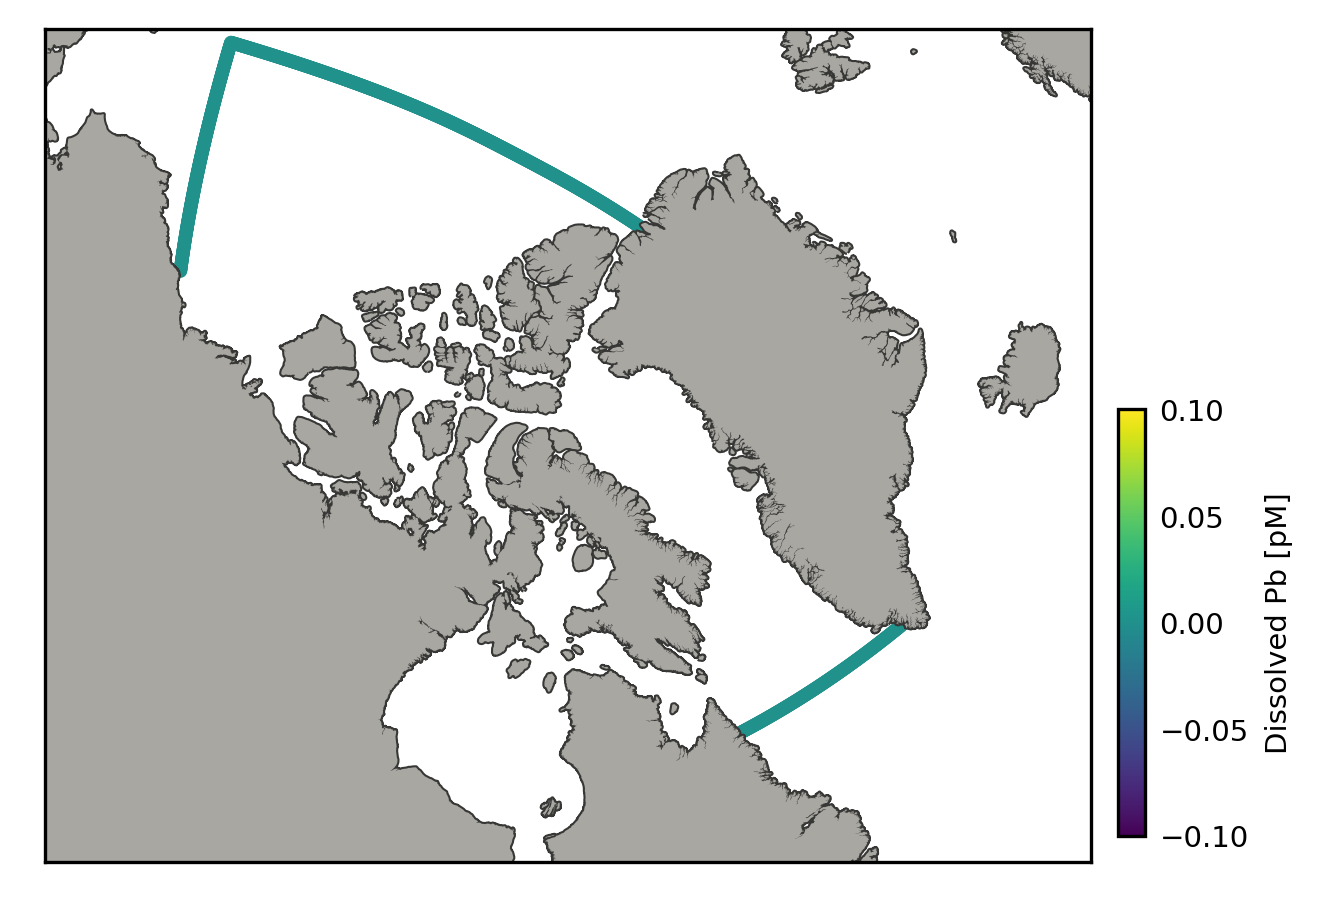

In [65]:
# resus
plot_weird(dpb, 15)

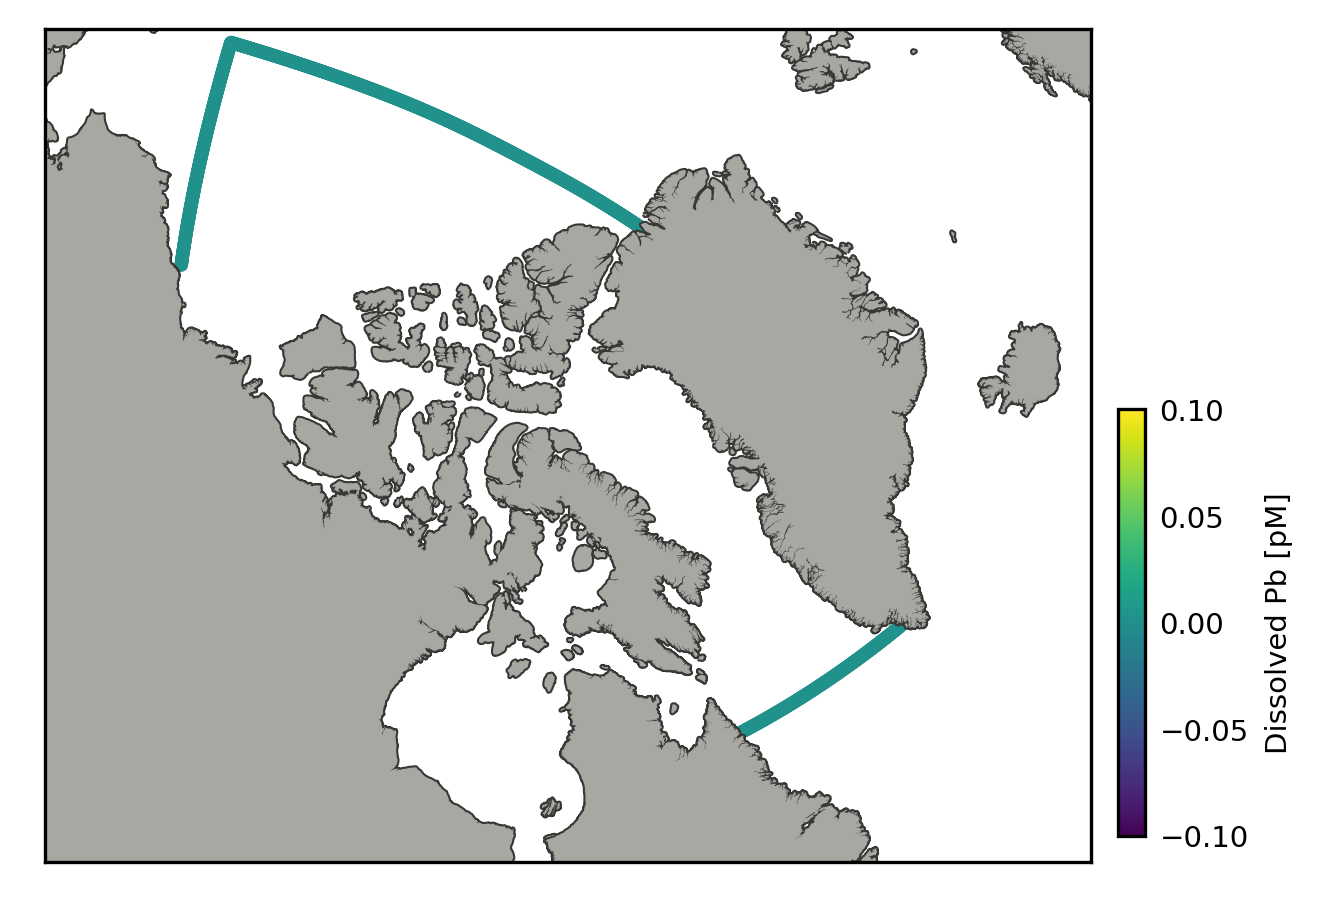

In [66]:
# sedice
plot_weird(dpb, 17)

#### Depth profiles

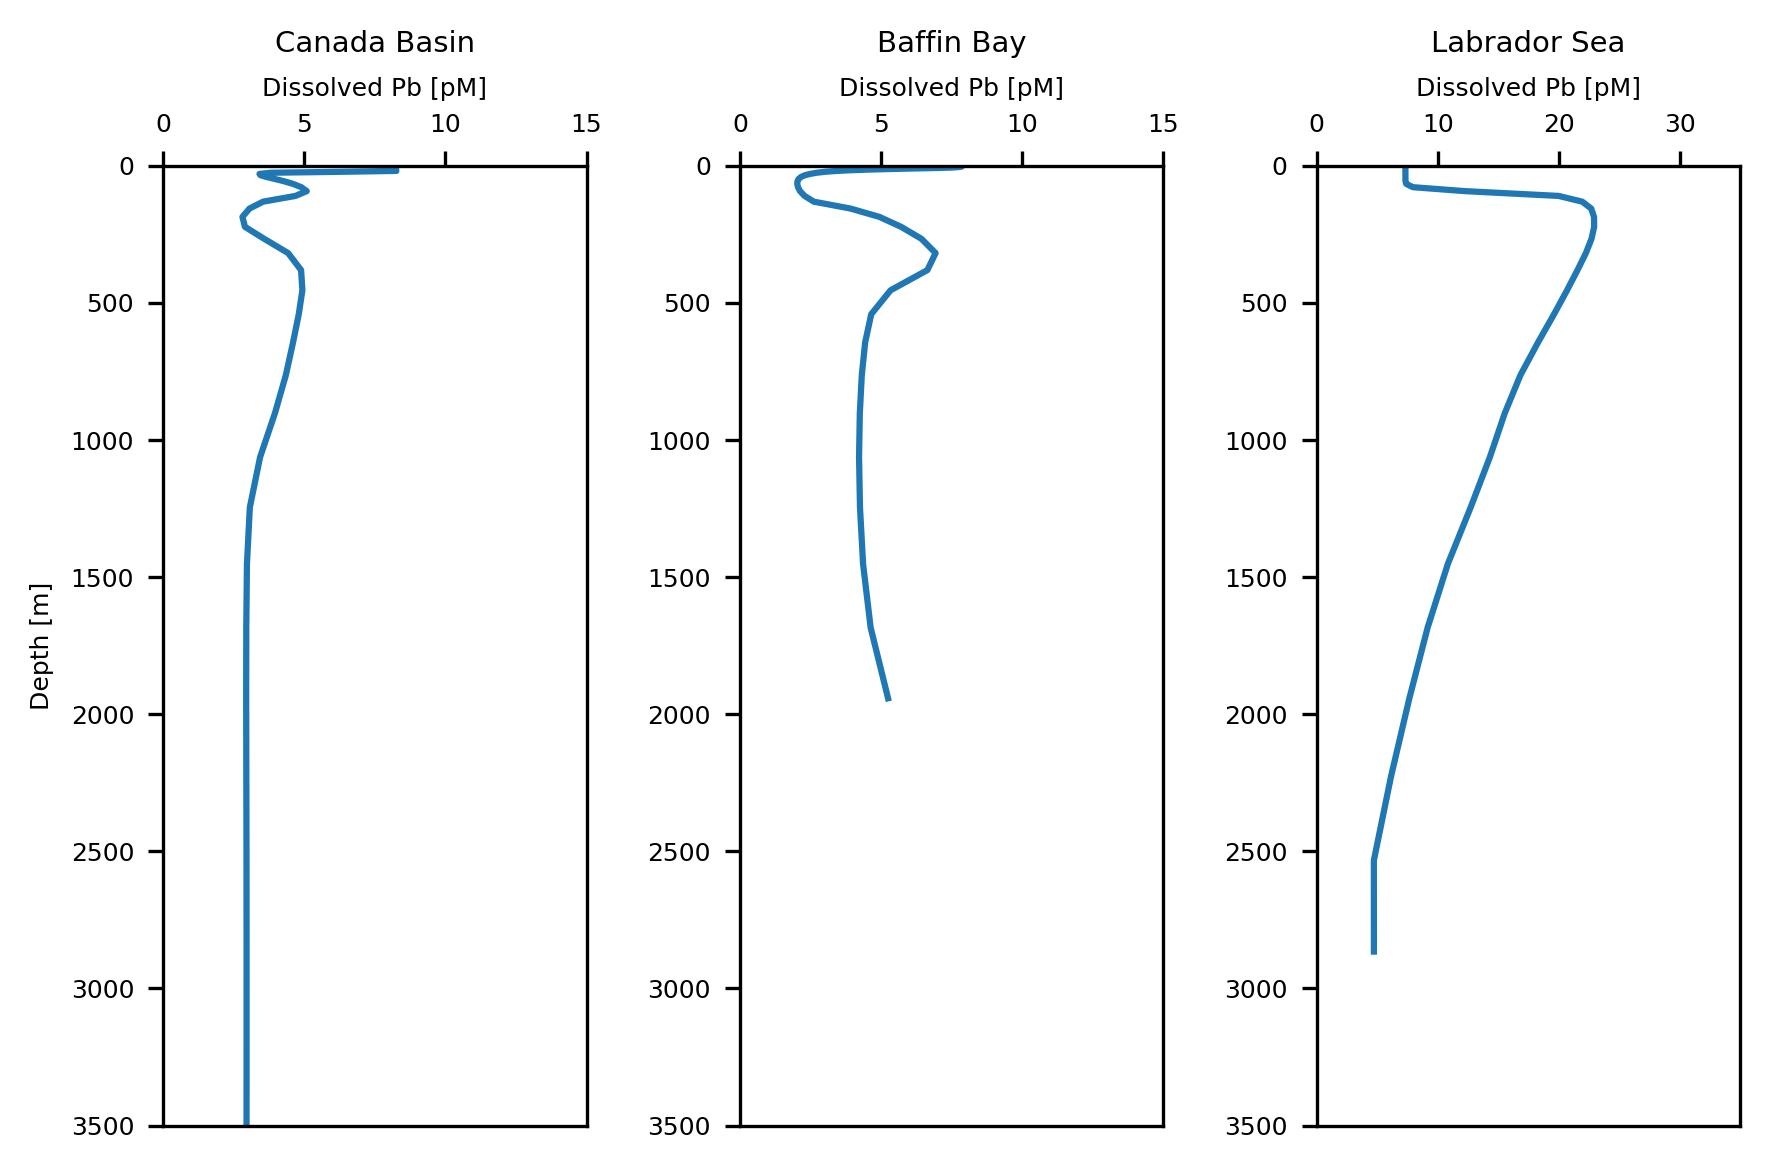

In [39]:
fig, ax = plt.subplots(1, 3, figsize=(6,4), dpi=300)
for axis in ax.ravel():
    axis.tick_params(axis='both', labelsize=6)
    axis.invert_yaxis()
    axis.set_xlabel('Dissolved Pb [pM]', fontsize=6)
    axis.xaxis.tick_top()
    axis.xaxis.set_label_position('top') 
    axis.set_xlim(0,15)
    axis.set_ylim(3500,0)
    
ax[2].set_xlim(0,35)

ax[0].set_ylabel('Depth [m]', fontsize=6)
ax[0].set_title('Canada Basin', fontsize=7)
ax[1].set_title('Baffin Bay', fontsize=7)
ax[2].set_title('Labrador Sea', fontsize=7)

ax[0].plot(dpb[:,900,450]*1e12, mesh_depth) # CB
ax[1].plot(dpb[:,280,420]*1e12, mesh_depth) # BB
ax[2].plot(dpb[:,50,400]*1e12, mesh_depth)  # LS

plt.tight_layout()

#### Look at boundary conditions

In [24]:
folder = '/data/brogalla/run_storage/Pb-new-ini2/'
data   = nc.Dataset(f'{folder}ANHA12_EXH006_5d_20020101_20021231_ptrc_T_20021018-20021022.nc')
dpb = np.array(data.variables['dissolpb'])[0,:,:,:]

print(np.ma.min(dpb), np.ma.max(dpb))

bdy_NCB = (1598,2177,778,798) # Northern Canada Basin 
bdy_WCB = (2168,2178,390,797) # Western Canada Basin
bdy_LS  = (1140,1150,446,672) # Baffin Bay 
bdy_HB  = (1190,1472,291,301) # Hudson Bay 

0.0 4.0164955e-10


In [25]:
# Labrador Sea
dPb_S_lons    = mesh_lon[bdy_LS[0]:bdy_LS[1],bdy_LS[2]:bdy_LS[3]] 
dPb_S_lats    = mesh_lat[bdy_LS[0]:bdy_LS[1],bdy_LS[2]:bdy_LS[3]]
dPb_S_mdepths = bathy_masked[:,bdy_LS[0]:bdy_LS[1],bdy_LS[2]:bdy_LS[3]]
dPb_S         = dpb[:,bdy_LS[0]-imin:bdy_LS[1]-imin, bdy_LS[2]-jmin:bdy_LS[3]-jmin]*1e12

# Hudson Bay
dPb_W_lons    = mesh_lon[bdy_HB[0]:bdy_HB[1],bdy_HB[2]:bdy_HB[3]] 
dPb_W_lats    = mesh_lat[bdy_HB[0]:bdy_HB[1],bdy_HB[2]:bdy_HB[3]] 
dPb_W_mdepths = bathy_masked[:,bdy_HB[0]:bdy_HB[1],bdy_HB[2]:bdy_HB[3]]
dPb_W         = dpb[:,bdy_HB[0]-imin:bdy_HB[1]-imin, bdy_HB[2]-jmin:bdy_HB[3]-jmin]*1e12

# Western Canada Basin
dPb_N_lons    = mesh_lon[bdy_WCB[0]:bdy_WCB[1],bdy_WCB[2]:bdy_WCB[3]] 
dPb_N_lats    = mesh_lat[bdy_WCB[0]:bdy_WCB[1],bdy_WCB[2]:bdy_WCB[3]]
dPb_N_mdepths = bathy_masked[:,bdy_WCB[0]:bdy_WCB[1],bdy_WCB[2]:bdy_WCB[3]] 
dPb_N         = dpb[:,bdy_WCB[0]-imin:bdy_WCB[1]-imin, bdy_WCB[2]-jmin:bdy_WCB[3]-jmin]*1e12

# Northern Canada Basin
dPb_E_lons    = mesh_lon[bdy_NCB[0]:bdy_NCB[1],bdy_NCB[2]:bdy_NCB[3]] 
dPb_E_lats    = mesh_lat[bdy_NCB[0]:bdy_NCB[1],bdy_NCB[2]:bdy_NCB[3]] 
dPb_E_mdepths = bathy_masked[:,bdy_NCB[0]:bdy_NCB[1],bdy_NCB[2]:bdy_NCB[3]] 
dPb_E         = dpb[:,bdy_NCB[0]-imin:bdy_NCB[1]-imin, bdy_NCB[2]-jmin:bdy_NCB[3]-jmin]*1e12

In [26]:
# Distances along slices of the rimwidth thickness boundary:
S_distance = np.empty(dPb_S_lats.shape)
N_distance = np.empty(dPb_N_lats.shape)
E_distance = np.empty(dPb_E_lats.shape)
W_distance = np.empty(dPb_W_lats.shape)

for layer in range(0,rimwidthS):
    S_distance[layer,:]  = calc_distance(dPb_S_lats[layer,:]   , dPb_S_lons[layer,:])    # Labrador Sea
    N_distance[layer,:]  = calc_distance(dPb_N_lats[layer,:]   , dPb_N_lons[layer,:])    # Labrador Sea
    W_distance[:,layer]  = calc_distance(dPb_W_lats[:,layer], dPb_W_lons[:,layer]) # Hudson Bay

for layer in range(0,rimwidthE):
    E_distance[:,layer]  = calc_distance(dPb_E_lats[:,layer], dPb_E_lons[:,layer]) # northern CB

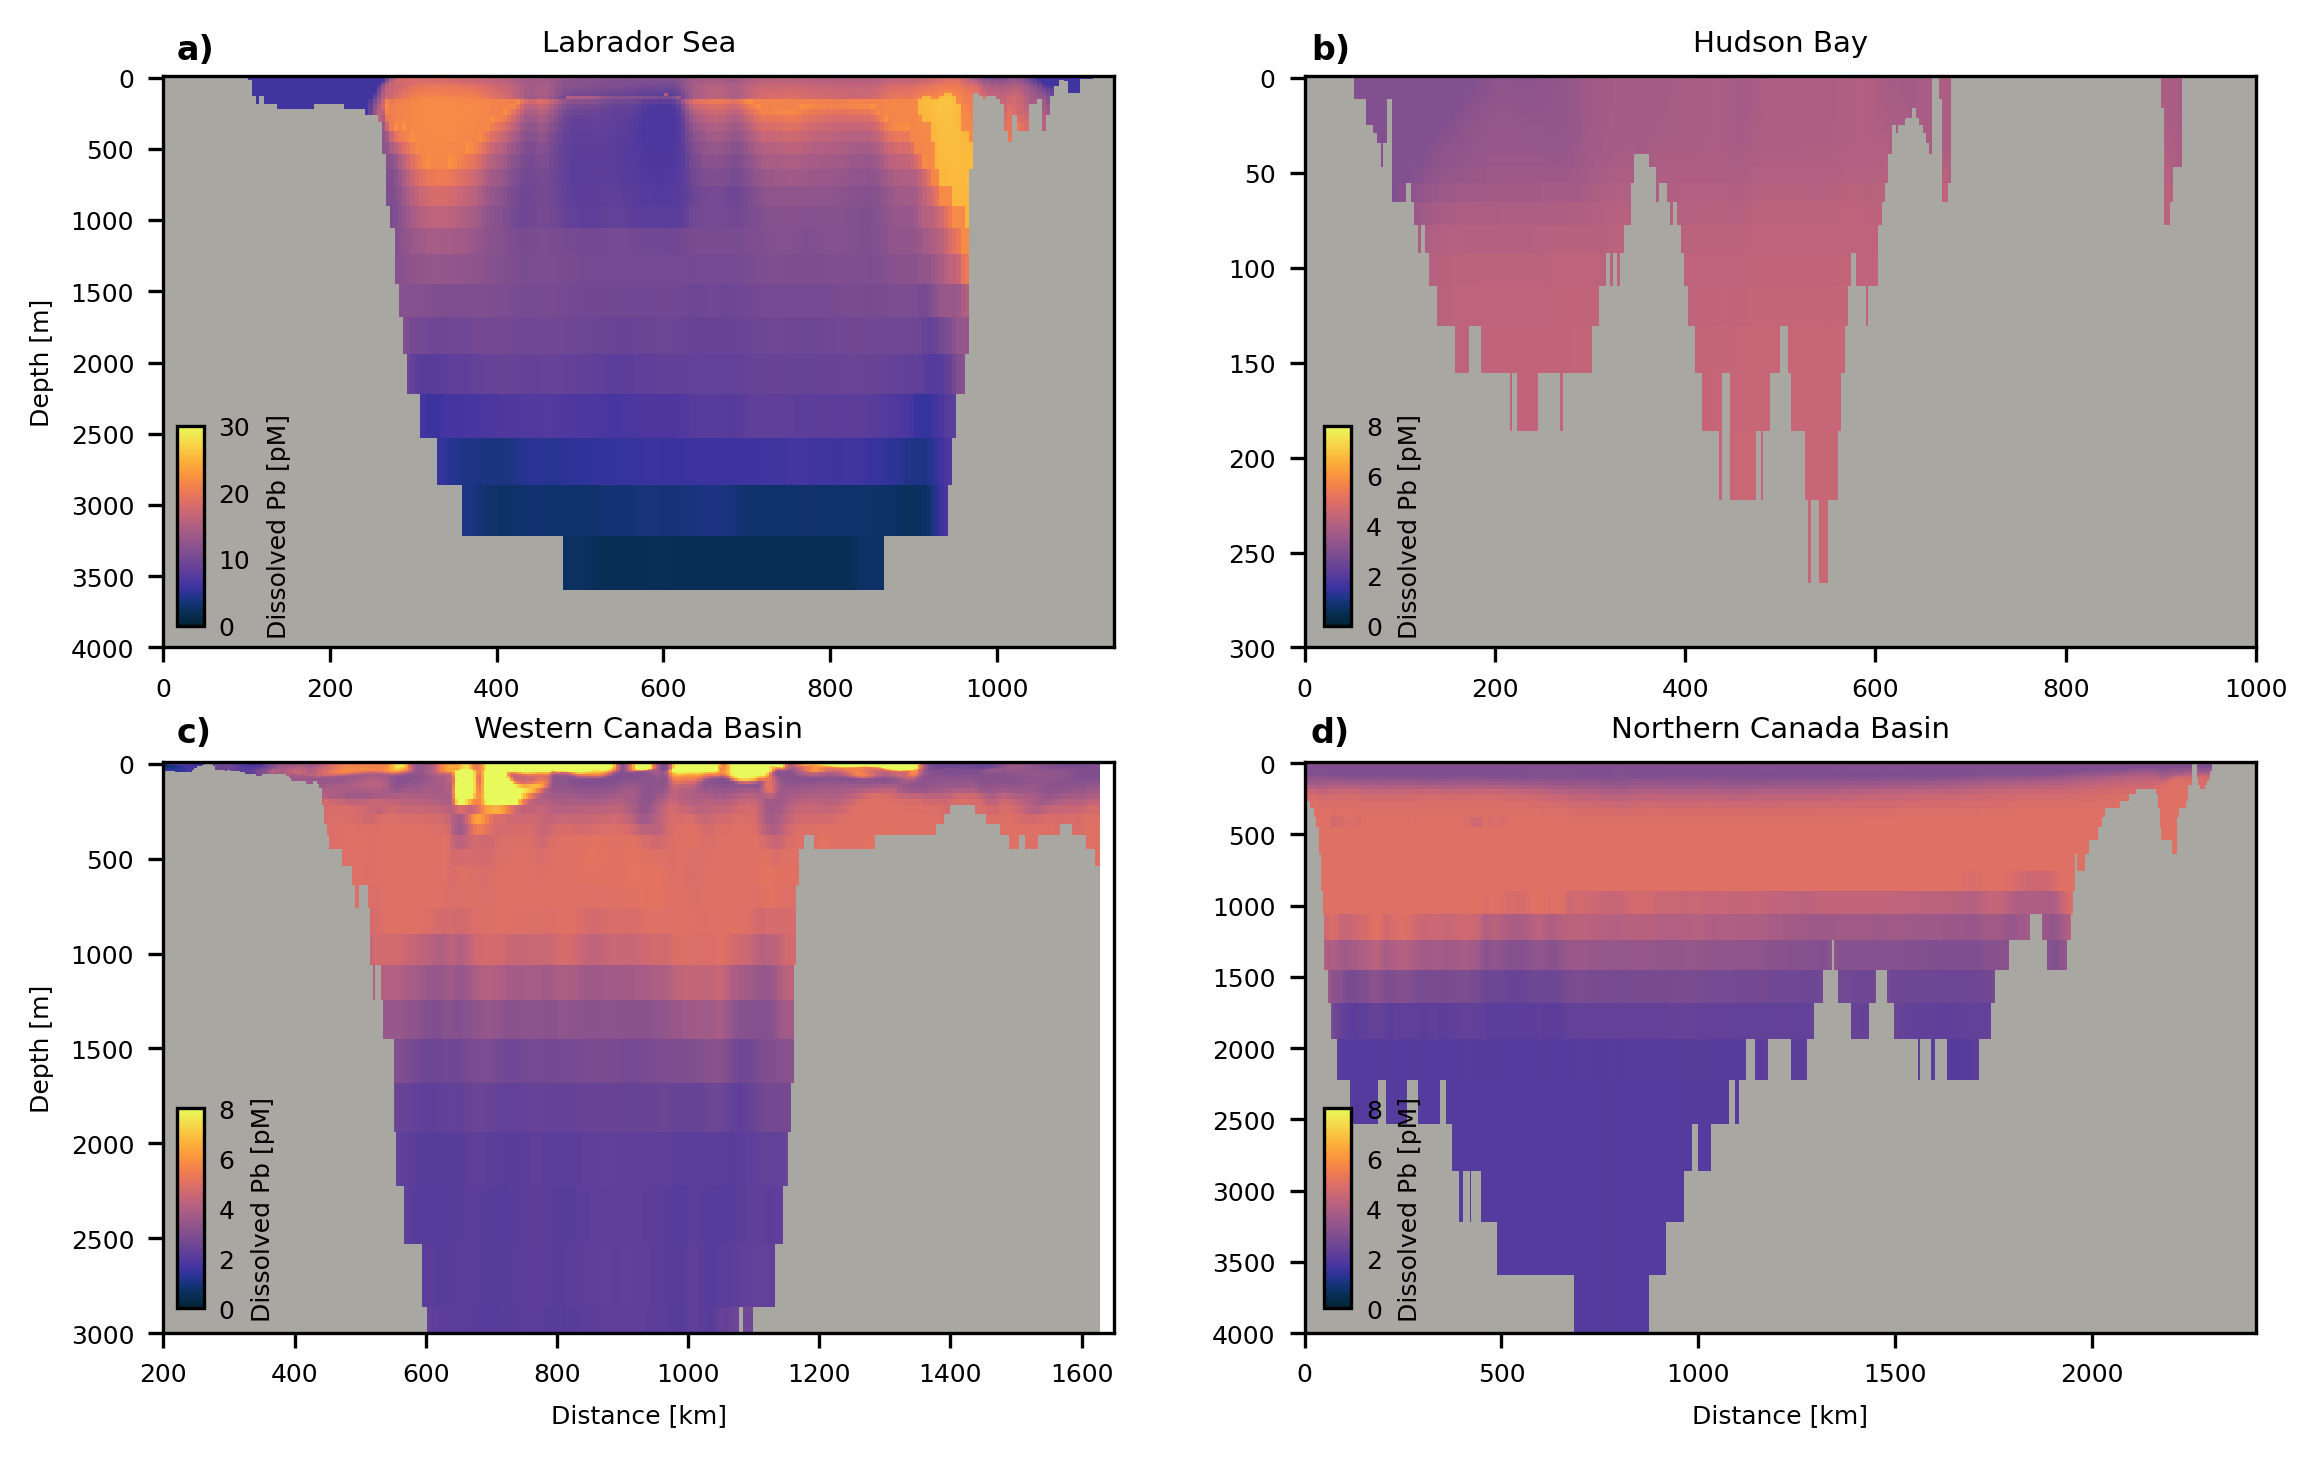

In [31]:
plot_bdy(0,15)

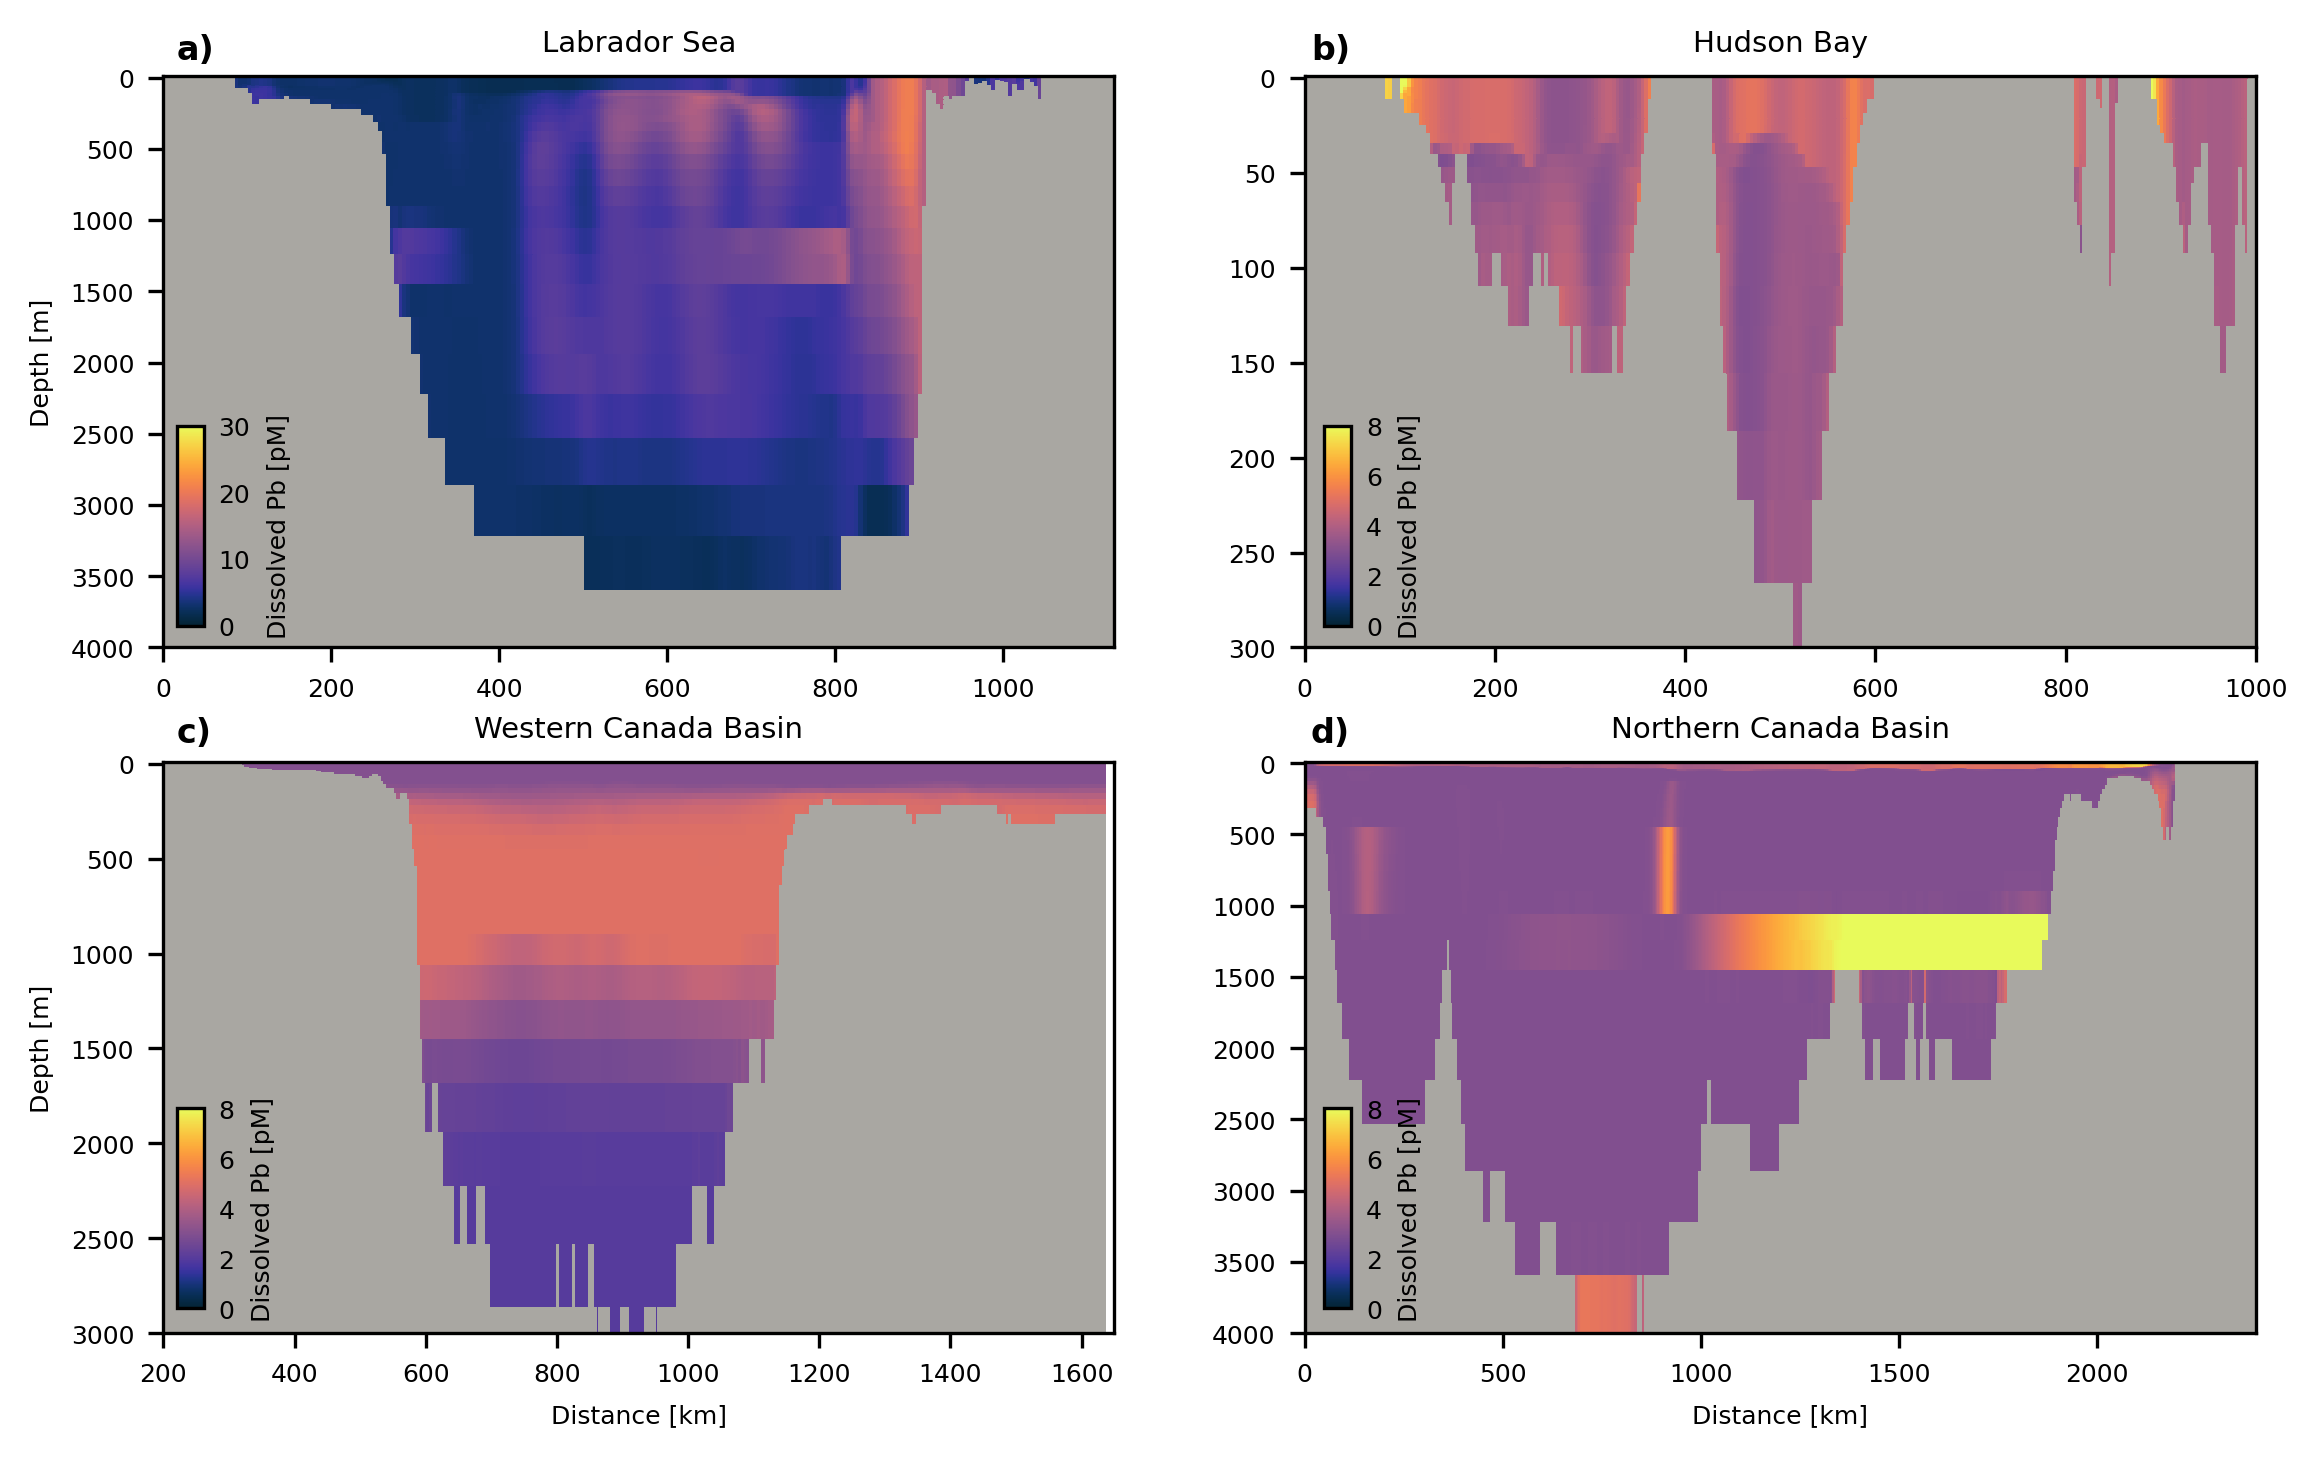

In [79]:
plot_bdy(9,1)